## The compaction-press problem 

In [1]:
%matplotlib inline
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spla
from scipy.optimize import fsolve, brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

The solution to the Filter Press problem was given as
\begin{equation}
  \label{eq:filterpress-cmprate}
  \cmp(z) = -\frac{W_0}{\cmplength_0}\,\e^{z/\cmplength_0} \quad \text{ for } \quad z\le0.
\end{equation}

In [2]:
def compaction_rate(z):
    """
    Solution to the Filter Press problem
    :param z: 
    :return: the normalized solution of the Filter Press problem
    """
    return -np.exp(z)

The compact rate function, equation \eqref{eq:filterpress-cmprate}, is plotted in Figure below.

In [3]:
z = np.linspace(-8, 0.0, 1000)
C = compaction_rate(z)

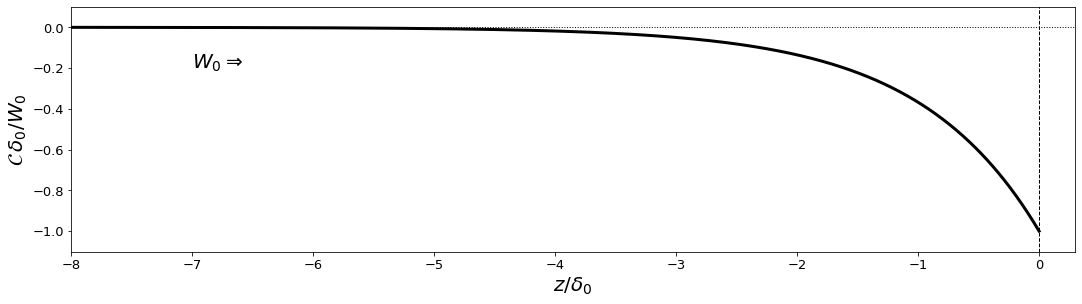

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 4.5)

ax.plot([0., 0], [-2., 2], '--k', linewidth=1)
ax.plot([-8.0, 1.0], [0., 0], ':k', linewidth=1)
ax.plot(z, C, '-k', linewidth=3)
ax.set_xlabel('$z/\delta_0$', fontsize=20)
ax.set_ylabel('$\mathcal{C}\,\delta_0/W_0$', fontsize=20)
ax.text(-7.0, -0.2, '$W_0 \Rightarrow$', fontsize=20)
ax.set_xlim(-8.0, 0.3)
ax.set_ylim(-1.1, 0.1)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

## The permeability-step problem

The porosity is given by the piece-wise constant function,
\begin{equation}
  \label{eq:permstep-porosity}
  \por(z) =
  \begin{cases}
    f_p\por_0 & \text{for $z > 0$},\\
    f_m\por_0 & \text{for $z \le 0$},
  \end{cases}
\end{equation}
where $f_i$ ($i=p,m$) are constants that multiply the reference porosity, chosen such that $f_i-\vert 1\vert\ll 1$.

The solution of the permeability-step problem was given as

\begin{equation}
  \label{eq:permstep-solution-full}
  \cmp(z) = \frac{\por_0w_0}{\cmplength_0}\tilde{f}
  \begin{cases}
    \exp\left(-z/\cmplength_p\right) & \text{for $z>0$},\\
    \exp\left(z/\cmplength_m\right) & \text{for $z\le 0$}.
  \end{cases}
\end{equation}

In [5]:
def cmprate(fp, fm, f0, n, z):
    """
    solution of the permeability-step problem
    :param fp:
    :param fm:
    :param f0:
    :param n:
    :param z:
    :return:
    """
    cmp = (np.power(fm, n) * (1.0 - fm*f0) 
           - np.power(fp, n) * (1.0 - fp*f0))/(np.power(fm, 0.5*n) + np.power(fp, 0.5*n))
    return np.asarray([cmp*np.exp(-z_* np.power(fp, -0.5*n)) if z_ > 0.0 
                       else cmp*np.exp(z_ * np.power(fm, 0.5*n)) for z_ in z])

The one-dimensional segregation flux $q \equiv \por(w-W)$ is given by 

\begin{equation}
  \label{eq:permstep-darcy-flux-solution}
  q = \por_0w_0
  \begin{cases}
    \left[f_p^\permexp(1-f_p\por_0) + \tilde{f}f_p^{\permexp/2}\exp(-z/\cmplength_p)\right] & z>0,\\[2mm]
    \left[f_m^\permexp(1-f_m\por_0) - \tilde{f}f_m^{\permexp/2}\exp(z/\cmplength_m)\right] & z\le0.
  \end{cases}
\end{equation}

In [6]:
def segflux(fp, fm, f0, n, z):
    """
    one-dimensional segmentation flux
    :param fp:
    :param fm:
    :param f0:
    :param n:
    :param z:
    :return:
    """
    cmp = (np.power(fm, n) * (1.0 - fm*f0) 
           - np.power(fp, n) * (1.0 - fp*f0))/(np.power(fm, 0.5*n) + np.power(fp, 0.5*n))
    return np.asarray([np.power(fp, n)*(1.0-fp*f0) + cmp*np.power(fp, 0.5*n)*np.exp(-z_* np.power(fp, -0.5*n)) 
                       if z_ > 0.0 
                       else np.power(fm, n)*(1.0 - fm*f0) - cmp* np.power(fm, 0.5*n)*np.exp(z_* np.power(fm, -0.5*n))
                       for z_ in z])

### Case 1

The porosity increases with *z*: $f_m=0.85$, $f_p=1.15$.

In [7]:
fm, fp = 0.85, 1.15
z = np.linspace(-4.0, 4.0, 1000)
f = np.asarray([fm if z_<0.0 else fp for z_ in z])

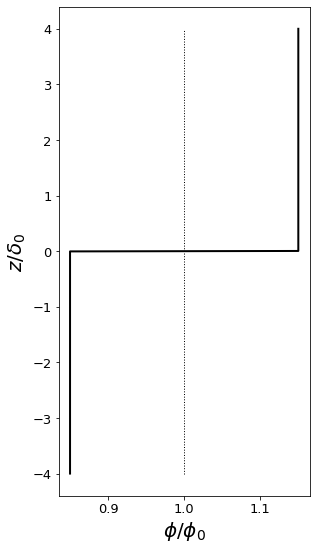

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(4.5, 9.0)

ax.plot(f, z, '-k', linewidth=2)
ax.plot(np.ones(1000), z, ':k', linewidth=1)
ax.set_ylabel(r'$z/\delta_0$', fontsize=20)
ax.set_xlabel(r'$\phi/\phi_0$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

The figure below shows that the scaled compaction rate and segregation flux for the porosity increase:

In [9]:
zmax = 4
n = 3
f0 = 0.01
z = np.linspace(-4.0, 4.0, 1000)

C = cmprate(fp, fm, f0, n, z)
fwmW = segflux(fp, fm, f0, n, z)

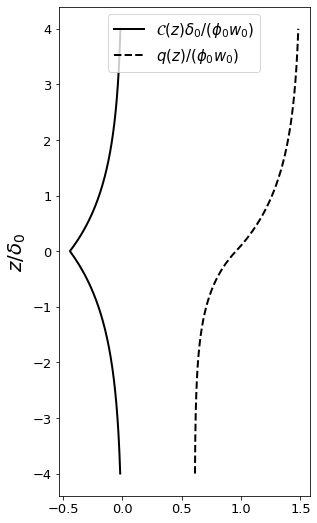

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(4.5, 9.0)

ax.plot(C, z, '-k', linewidth=2, label='$\mathcal{C}(z)\delta_0/(\phi_0w_0)$')
ax.plot(fwmW, z,'--k', linewidth=2, label='$q(z)/(\phi_0w_0)$')
ax.set_ylabel(r'$z/\delta_0$', fontsize=20)
ax.legend(fontsize=15, loc='upper center')
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

### Case 2

The porosity decreases with *z*: $f_m=1.15$, $f_p=0.85$

In [11]:
fm, fp = 1.15, 0.85
f = np.asarray([fm if z_<0.0 else fp for z_ in z])

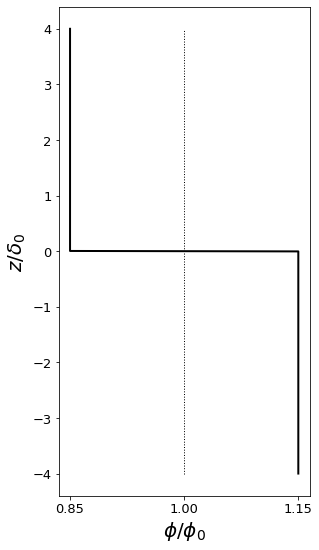

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(4.5, 9.0)

ax.plot(f, z, '-k', linewidth=2)
ax.plot(np.ones(1000), z, ':k', linewidth=1)
ax.set_xticks((0.85, 1.0, 1.15))
ax.set_ylabel(r'$z/\delta_0$', fontsize=20)
ax.set_xlabel(r'$\phi/\phi_0$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.show()

The figure below shows that the scaled compaction rate and segregation flux for the porosity decrease:

In [13]:
zmax = 4
n = 3
f0 = 0.01
z = np.linspace(-4.0, 4.0, 1000)

C = cmprate(fp, fm, f0, n, z)
fwmW = segflux(fp, fm, f0, n, z)

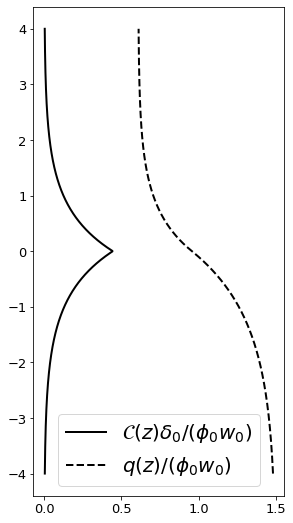

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(4.5, 9.0)

ax.plot(C, z, '-k', linewidth=2, label='$\mathcal{C}(z)\delta_0/(\phi_0w_0)$')
ax.plot(fwmW, z,'--k', linewidth=2, label='$q(z)/(\phi_0w_0)$')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(fontsize=20, loc='lower center')
plt.show()

## Propagation of small porosity disturbances

The phase ($c_p$) and group ($c_g$) velocities are given as

\begin{align}
\label{eq:linwave-phase-vel}
    c_p &= \frac{\permexp}{k^2 + 1},\\
    c_g &= c_p - \frac{2\permexp k^2}{(k^2 + 1)^2}. 
\end{align}

The phase ($c_p$) and group ($c_g$) velocities are plotted below as a function of the wavelength $\lambda=2\pi/k$.

In [15]:
lambdas = np.logspace(-2.0, 3.0, 1000)
k = 2*np.pi/lambdas

n = 2.0
cp_2 = n/(k ** 2 + 1)
cg_2 = cp_2 - 2.0 * n * (k**2) / ((k**2 + 1.0) ** 2)

n = 3.0
cp_3 = n/(k**2 + 1)
cg_3 = cp_3 - 2.0 * n * (k**2) / ((k**2 + 1.0) ** 2)

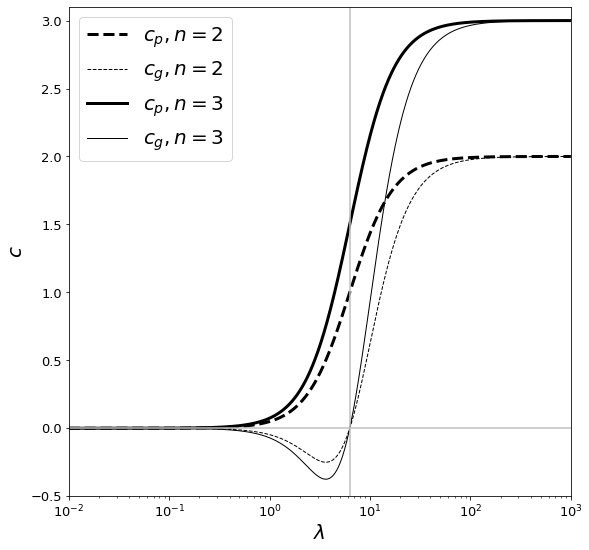

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

ax.semilogx(lambdas, cp_2, '--k', linewidth=3, label='$c_p, n=2$')
ax.semilogx(lambdas, cg_2, '--k', linewidth=1, label='$c_g, n=2$')

ax.semilogx(lambdas, cp_3, '-k', linewidth=3, label='$c_p, n=3$')
ax.semilogx(lambdas, cg_3, '-k', linewidth=1, label='$c_g, n=3$')

ax.plot([10**(-5), 10**5], [0.0, 0.0], '-', color=[0.75, 0.75, 0.75])
ax.plot([2.0*np.pi, 2.0*np.pi],[-10.0, 10.0],'-', color=[0.75, 0.75, 0.75])

ax.set_xlabel(r'$\lambda$', fontsize=20)
ax.set_ylabel(r'$c$', fontsize=20)
ax.set_ylim(-0.5, 3.1)
ax.set_xlim(10**(-2), 10**3)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.legend(fontsize=20)
plt.show()

## Magmatic solitary waves

The solitary wave speed $v$ is computed as

\begin{equation}
  \label{eq:magmons-wavespeed}
  \solwavespeed(\solwaveamp) = 
  \begin{cases}
    (\solwaveamp-1)^2/\left(\solwaveamp\ln\solwaveamp - \solwaveamp+1\right)& \text{for }\permexp=2,\\
    2\solwaveamp + 1 & \text{for }\permexp=3.
  \end{cases}
\end{equation}

The dimensionless solitary wave speed $\solwavespeed$ computed with equation \eqref{eq:magmons-wavespeed} as a function of wave amplitude $\solwaveamp$ relative to the background porosity is plotted below.

In [17]:
lambdas = np.linspace(1.001, 4.0, 1000)

c2 = (lambdas - 1.0)**2 / (lambdas * np.log(lambdas) - lambdas + 1.0)
c3 = 2.0 * lambdas + 1.0

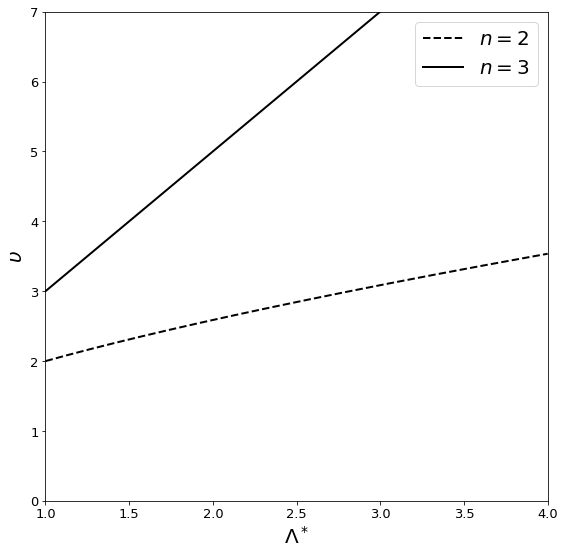

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

ax.plot(lambdas, c2, '--k', linewidth=2, label='$n=2$')
ax.plot(lambdas, c3, '-k', linewidth=2, label='$n=3$')
ax.set_xlim(1.0, 4.0)
ax.set_ylim(0.0, 7.0)
ax.set_xlabel(r'$\Lambda^*$', fontsize=20)
ax.set_ylabel(r'$\upsilon$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(fontsize=20)
plt.show()

The normalized porosity profile is obtained through numerical inversion of

\begin{equation}
  \label{eq:magmons-implict-shape}
  Z(\solwave) = \left(\solwaveamp+\tfrac{1}{2}\right)^{\tfrac{1}{2}}\left[
    \frac{1}{(\solwaveamp-1)^{\tfrac{1}{2}}}\ln\left(
      \frac{(\solwaveamp-1)^{\tfrac{1}{2}}-(\solwaveamp-\solwave)^{\tfrac{1}{2}}}
      {(\solwaveamp-1)^{\tfrac{1}{2}}+(\solwaveamp-\solwave)^{\tfrac{1}{2}}}
    \right)-2\left(\solwaveamp-\solwave\right)^{\tfrac{1}{2}}\right]
\end{equation}

which is implemented in Python as

In [19]:
def porosity(f, z, A): 
    """
    normalized porosity profile
    :param f:
    :param z:
    :param A:
    :return: 
    """
    sqrtAf = np.sqrt(A-f)
    sqrtAm1 = np.sqrt(A - 1.)
    return z + np.sqrt(A+0.5)*(-2.*sqrtAf + np.log((sqrtAm1-sqrtAf)/(sqrtAm1+sqrtAf))/sqrtAm1)

Profiles of normalised porosity perturbation for solitary waves of various amplitude are plotted below. We set $\permexp=3$ in all cases.

In [20]:
zmax = 25.0
zs = np.linspace(0.0, zmax, 100)
zm = 0.5*(zs[1:]+zs[0:-1])

AsLS = {2.: '-.', 4.: '-', 6.:'--', 8.: ':'}
phi = {}
for A, ls in AsLS.items():
    phi[A] = np.asarray([brentq(lambda f: porosity(f, z, A), 1.000000001, A) for z in zs])

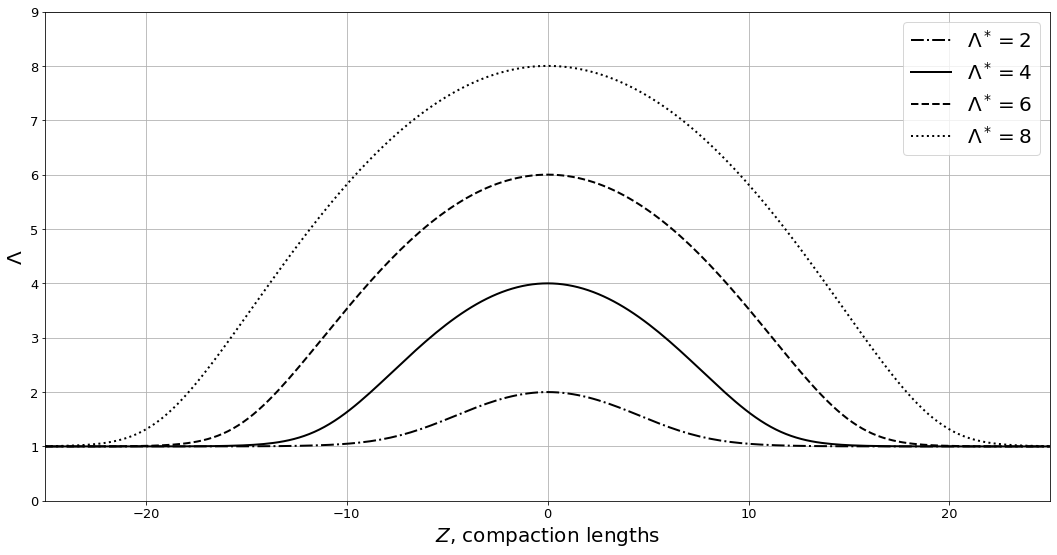

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)
fig.set_facecolor('w')

for A, ls in AsLS.items():
    ax.plot(np.concatenate((-zs[::-1], zs), axis=0), np.concatenate((phi[A][::-1], phi[A]), axis=0), 
             'k', label='$\Lambda^* = '+str(int(A))+'$', linestyle=ls, linewidth=2)
ax.set_xlim(-zmax, zmax)
ax.set_ylim(0.0, 9.0)
ax.grid()
ax.set_xlabel(r'$Z$, compaction lengths', fontsize=20)
ax.set_ylabel(r'$\Lambda$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(fontsize=20)
plt.show()

Profiles of compaction rate for solitary waves of various amplitude. $\permexp=3$ in all cases. The gravity vector $\gravity$ points to the left, as indicated in the figure below.

In [22]:
zmax = 25.0
zs = np.linspace(0.0, zmax, 100)
zm = 0.5*(zs[1:]+zs[0:-1])

AsLS = {2: '-.', 4: '-', 6:'--', 8: ':'}
C = {}
for A, ls in AsLS.items():
    C[A] = -(2.0*A + 1.0)*(phi[8][1:]-phi[8][0:-1])/(zs[1]-zs[0])  # phi is defined in the previous cell

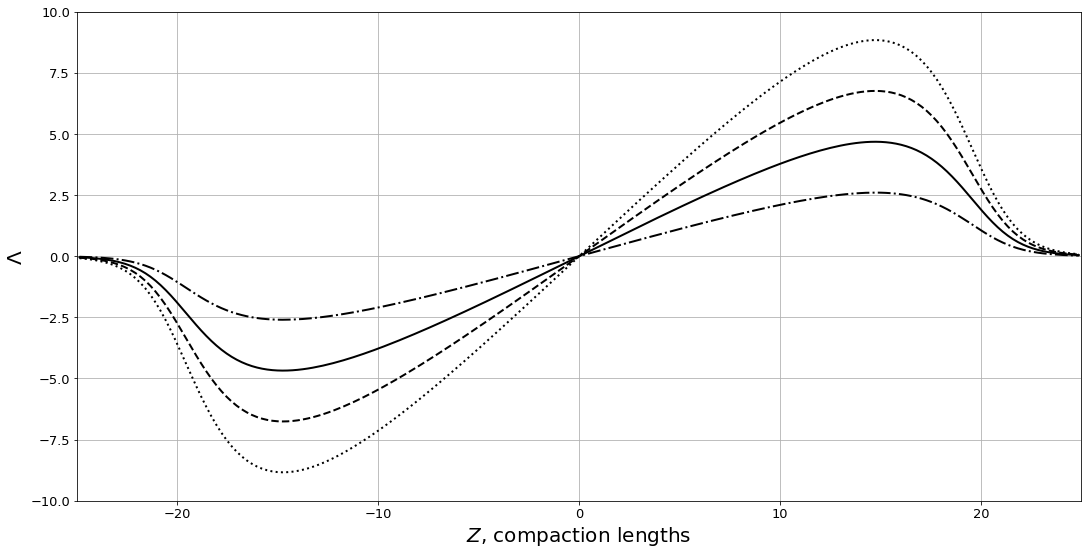

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(18.0, 9.0)

for A, ls in AsLS.items():
    plt.plot(np.concatenate((-zm[::-1], zm), axis=0), np.concatenate((-C[A][::-1], C[A]), axis=0), 
             'k', linestyle=ls, linewidth=2)
ax.set_xlim(-zmax, zmax)
ax.set_ylim(-10.0, 10.0)
ax.grid()
ax.set_xlabel(r'$Z$, compaction lengths', fontsize=20)
ax.set_ylabel(r'$\Lambda$', fontSize=20)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.show()

## Solitary-wave trains

The equations below admit a nonlinear solitary wave solution:
\begin{align}
-\left(\npor^\permexp\cmp_z\right)_z + \cmp &= -\left(\npor^\permexp\right)_z, \\
\npor_t &= \cmp.                                                 
\end{align}
which is plotted below:

In [24]:
def get_compaction_rate_dirichlet(phi, n, dz, phi0):
    n_ = len(phi)
    perm = np.sqrt((phi[0:-1] ** n) * (phi[1:] ** n))
    # rhs
    b = np.zeros(n_, dtype=float)
    b[1:-1] = phi0 * dz * (perm[1:] - perm[0:-1])
    # matrix
    offsets = np.array([0, -1, 1])
    data = np.zeros(3*n_).reshape(3, n_)
    data[0, 0] = data[0, -1] = 1
    data[0, 1:-1] = -(perm[0:-1] + perm[1:] + dz * dz)  # diagonal
    data[1, 0:-2] = perm[0:-1]  # sub-diagonal
    data[2, 2:] = perm[1:]  # sup-diagonal
    mtx = sps.dia_matrix((data, offsets), shape=(n_, n_))
    mtx = mtx.tocsr()
    # solution of linear system
    Cmp = spla.dsolve.spsolve(mtx, b)
    return Cmp

In [25]:
def solitary_wave_update_porosity(PhiOld, n, phi0, dz, dt):
    Cmp = get_compaction_rate_dirichlet(PhiOld, n, dz, phi0)
    PhiNew = PhiOld + dt * Cmp / phi0
    Cmp = 0.5 * (Cmp + get_compaction_rate_dirichlet(PhiNew, n, dz, phi0))
    PhiNew = PhiOld + dt * Cmp / phi0
    return PhiNew

In [26]:
phi0 = 0.05  # background porosity
A = 1.5  # amplitude of step
zmax = 150.  # total size of domain
z0 = zmax / 5.  # location of step
zw = 10.  # width of step
n = 3.  # permeability exponent
Nz = 1000  # number of grid points
cfl = 1.  # courant limit on time-step
tmax = 70.  # maximum time

# initial condition
z = np.linspace(0.0, zmax, Nz)
f = 1. - (A - 1.) * (1 + np.tanh((z - z0) / zw)) / 2.

# derived parameters
dz = z[1] - z[0]
V = (1. - phi0 ** n) / (1. - phi0)
dt = cfl * dz / V
Nt = np.ceil(tmax / dt)

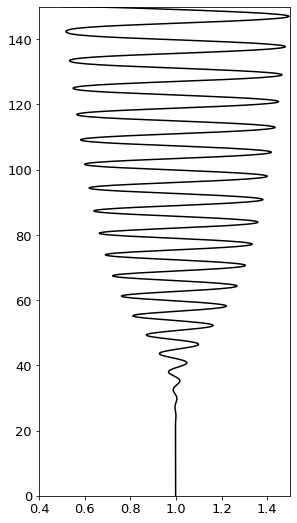

In [27]:
fig, ax = plt.subplots(figsize=(4.5, 9.0))
ln, = plt.plot([], [], 'k')

rc('animation', html='html5')

def init():
    ax.set_xlim(0.4, 1.5)
    ax.set_ylim(0., zmax)
    ax.tick_params(axis='both', which='major', labelsize=13)
    return ln,

def update(frame):
    global f
    f = solitary_wave_update_porosity(f, n, phi0, dz, dt)
    ln.set_data(f, z)
    return ln,

anim = animation.FuncAnimation(fig, update, frames=np.linspace(0, tmax, Nt), init_func=init, blit=True)

HTML(anim.to_html5_video())

## Solitary-wave swap

In [28]:
def xi(f, A):
    """
    
    :param f:
    :param A:
    :return: 
    """
    return -np.sqrt(A+0.5)*(-2.*np.sqrt(A-f)+np.log((np.sqrt(A-1.0)-np.sqrt(A-f))/
                                                    (np.sqrt(A-1)+np.sqrt(A-f)))/np.sqrt(A-1.))

In [29]:
def SolitaryWaveGenerator(Amplitude, z, z0):
    """
    
    :param Amplitude:
    :param z:
    :param z0:
    :return:
    """
    g = np.ones(z.shape[0])
    zeta = np.abs(z-z0)
    fEpsilon = 1.000000001
    zetaEpsilon = xi(fEpsilon, Amplitude)
    ifill = np.nonzero(zeta <= zetaEpsilon)
    for i in ifill[0]:
        g[i] = brentq(lambda phi_: xi(phi_, Amplitude)-zeta[i], fEpsilon, Amplitude)
    return g

In [30]:
phi0 = 0.05  # background porosity
A = 2.  # amplitude of step
zmax = 300.0  # total size of domain
z0 = zmax/10.0  # location of step
zw = 10.0  # width of step
n = 3  # permeability exponent
Nz = 3000  # number of grid points
cfl = 1  # courant limit on time-step
tmax = 50.0  # maximum time

# derived parameters
dz = z[1] - z[0]
V = (1. - phi0 ** n) / (1. - phi0)
dt = cfl * dz / V
Nt = np.ceil(tmax / dt)

# initial condition
z = np.linspace(0.0, zmax, Nz)
gbig = SolitaryWaveGenerator(A, z, z0)
gsml = SolitaryWaveGenerator(1.+(A-1.)/5., z, z0+50.)
g = gbig + gsml - 1

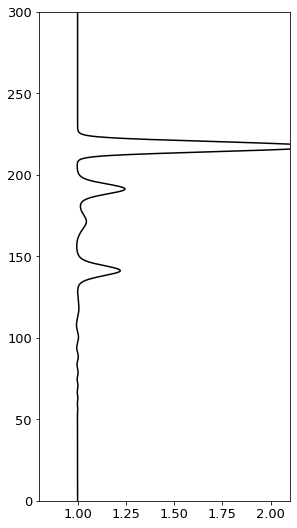

In [31]:
fig, ax = plt.subplots(figsize=(4.5, 9.0))
ln, = plt.plot([], [], 'k')

def init():
    ax.set_xlim(0.8, 2.1)
    ax.set_ylim(0., zmax)
    ax.tick_params(axis='both', which='major', labelsize=13)
    return ln,

def update(frame):
    global g
    g = solitary_wave_update_porosity(g, n, phi0, dz, dt)
    ln.set_data(g, z)
    return ln,

anim = animation.FuncAnimation(fig, update, frames=np.linspace(0., tmax, Nt), init_func=init, blit=True)

HTML(anim.to_html5_video())